In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import os

- ### 先將資料抓進來，並檢查看看，做一下整理

In [2]:
import numpy as np
import pandas as pd
pipe3 = pd.read_csv("林園管歷史資料擷取.csv",encoding="ANSI")
pipe3 = pipe3.drop(0)
# pipe3 = pipe3.drop("Unnamed: 113", axis = 1)
print(pipe3.shape)
pipe3.head()
# pipe3.describe(include = "all")

(2303, 36)


,Time,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率,台移動平均(20min),移動平均流量偏差,Unnamed: 8,Time.1,...,中+亞.3,台變化率.3,中+亞變化率.3,Unnamed: 29,Time.4,CLY_USI_03_FI_BC.4,FI-254-1.PV.4,中+亞.4,台變化率.4,中+亞變化率.4
1,2022/4/7 00:05,-1.500216,18211.16406,17843.47336,0.002995,0.018048,NaN,NaN,NaN,2022/4/21 00:05,...,12152.65018,32.550840,0.065733,NaN,2021/10/14 00:05,-2.369054,15315.05664,14862.94549,-0.031175,-0.013743
2,2022/4/7 00:10,-1.796756,18183.98047,17764.79059,-0.001493,-0.004410,NaN,NaN,NaN,2022/4/21 00:10,...,11927.50119,-0.063323,-0.018527,NaN,2021/10/14 00:10,1.488304,15167.20020,15294.83386,-0.009654,0.029058
3,2022/4/7 00:15,-1.485461,18182.50781,17817.83091,-0.000081,0.002986,18183.60742,-1.491632,NaN,2022/4/21 00:15,...,11460.60702,-0.029933,-0.039144,NaN,2021/10/14 00:15,0.769236,15244.94531,15262.34876,0.005126,-0.002124
4,2022/4/7 00:20,-0.029753,18010.86328,17905.53583,-0.009440,0.004922,18147.12891,-0.790778,NaN,2022/4/21 00:20,...,11841.97966,-0.064814,0.033277,NaN,2021/10/14 00:20,3.103397,15181.18945,15564.20866,-0.004182,0.019778
5,2022/4/7 00:25,0.226940,18056.63086,17997.47436,0.002541,0.005135,18108.49561,-0.061238,NaN,2022/4/21 00:25,...,11678.08348,0.044504,-0.013840,NaN,2021/10/14 00:25,-6.937265,15803.76855,14685.02918,0.041010,-0.056487


In [23]:
pipe3.describe(include = "all")

,Time,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率,台移動平均(20min),移動平均流量偏差,Unnamed: 8,Time.1,...,中+亞.3,台變化率.3,中+亞變化率.3,Unnamed: 29,Time.4,CLY_USI_03_FI_BC.4,FI-254-1.PV.4,中+亞.4,台變化率.4,中+亞變化率.4
count,2303,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2301.000000,2301.000000,0.0,2279,...,1727.000000,1727.000000,1727.000000,0.0,2303,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
unique,2303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2279,...,NaN,NaN,NaN,NaN,2303,NaN,NaN,NaN,NaN,NaN
top,2022/4/7 00:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/4/21 00:05,...,NaN,NaN,NaN,NaN,2021/10/14 00:05,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.388515,18218.901941,18198.842367,0.000074,0.000151,18219.138835,0.390036,NaN,NaN,...,12589.038785,0.019135,0.000217,NaN,NaN,-0.530241,16458.662628,16288.782447,0.000129,0.000657
std,NaN,2.369656,408.398825,567.370506,0.013047,0.016687,375.500780,2.146761,NaN,NaN,...,1400.394313,0.783502,0.012472,NaN,NaN,4.135846,423.930169,543.326523,0.014471,0.036063
min,NaN,-14.237984,15919.327150,15988.052020,-0.064099,-0.076681,16015.531010,-12.621112,NaN,NaN,...,9787.424276,-0.152609,-0.070606,NaN,NaN,-91.668839,14596.462890,8436.295710,-0.090857,-0.483516
25%,NaN,-1.137796,18051.263670,17853.681035,-0.007586,-0.010620,18063.835450,-1.013164,NaN,NaN,...,11404.616100,-0.007918,-0.006645,NaN,NaN,-2.202129,16265.724610,16026.177535,-0.007480,-0.015277
50%,NaN,0.357233,18281.957030,18165.078060,-0.000064,0.000396,18283.296390,0.257343,NaN,NaN,...,12320.578670,-0.000048,0.000200,NaN,NaN,-0.284086,16479.697270,16322.139450,-0.000486,0.000347
75%,NaN,1.974995,18470.547850,18556.502155,0.007106,0.010877,18450.789550,1.778038,NaN,NaN,...,13639.201155,0.007984,0.006950,NaN,NaN,1.358872,16687.204105,16601.122125,0.007632,0.015417


In [24]:
pipe3.columns

Index(['Time', 'CLY_USI_03_FI_BC', 'FI-254-1.PV', '中+亞', '台變化率', '中+亞變化率',
       '台移動平均(20min)', '移動平均流量偏差', 'Unnamed: 8', 'Time.1',
       'CLY_USI_03_FI_BC.1', 'FI-254-1.PV.1', '中+亞.1', '台變化率.1', '中+亞變化率.1',
       'Unnamed: 15', 'Time.2', 'CLY_USI_03_FI_BC.2', 'FI-254-1.PV.2', '中+亞.2',
       '台變化率.2', '中+亞變化率.2', 'Unnamed: 22', 'Time.3', 'CLY_USI_03_FI_BC.3',
       'FI-254-1.PV.3', '中+亞.3', '台變化率.3', '中+亞變化率.3', 'Unnamed: 29', 'Time.4',
       'CLY_USI_03_FI_BC.4', 'FI-254-1.PV.4', '中+亞.4', '台變化率.4', '中+亞變化率.4'],
      dtype='object')

In [25]:
type(pipe3)

pandas.core.frame.DataFrame

In [26]:
# ## 可以用這個方法重新整理part1 的資料，但較不推，因為改個title可能就不能用了
# part_1 = ['Time', 'CLY_USI_03_FI_BC', 'FI-254-1.PV', '中+亞', '台變化率', '中+亞變化率']
# part_1_df = pipe3[part_1]
# part_1_df.index = part_1_df['Time']
# part_1_df = part_1_df.drop(['Time'], axis='columns')
# part_1_df.isnull().max() # 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面

+ **因為資料中分了很多個時間區段，得切成好幾段分批訓練**
+ **用這個方法重新整理part1 的資料，較推，因為改個title還能用**

In [27]:
part_1_df = pipe3.iloc[:,0:6]
part_1_df.index = part_1_df.iloc[:,0]
part_1_df.isnull().max() # 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面
part_1_df = part_1_df.drop(part_1_df.columns[0], axis='columns')
part_1_df

,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率
Time,,,,,
2022/4/7 00:05,-1.500216,18211.16406,17843.47336,0.002995,0.018048
2022/4/7 00:10,-1.796756,18183.98047,17764.79059,-0.001493,-0.004410
2022/4/7 00:15,-1.485461,18182.50781,17817.83091,-0.000081,0.002986
2022/4/7 00:20,-0.029753,18010.86328,17905.53583,-0.009440,0.004922
2022/4/7 00:25,0.226940,18056.63086,17997.47436,0.002541,0.005135
...,...,...,...,...,...
2022/4/14 23:35,0.415472,17945.28516,17919.73659,0.009418,-0.001940
2022/4/14 23:40,-1.595123,17919.31445,17539.53723,-0.001447,-0.021217
2022/4/14 23:45,-1.075228,17957.92969,17667.95885,0.002155,0.007322


**畫出來看看**

array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current

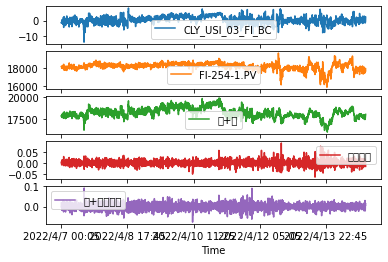

In [28]:
part_1_df.plot(subplots=True)

**設定多少筆資料當training data**

In [29]:
TRAIN_SPLIT= 1500

**下面是用來測試再現性用的**

In [30]:
tf.random.set_seed(13)

**做資料正規化**

In [31]:
# ## 正規化 normalize MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# X = pd.DataFrame(X)
# X

**胡老師DL-PART3-TF2_RNNs-Ch06-RNNs_Workshop_5-RNNs_for_Time_Series_Forecasting.ipynb這份檔中的正規化方法**

In [32]:
dataset = part_1_df.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [33]:
dataset = (dataset-data_mean)/data_std

In [34]:
dataset.shape

(2303, 5)

# 從單變數的方式做做看

In [35]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size # start_index最少要比history_size後面
    if end_index is None:
        end_index = len(dataset) - target_size # 如果沒設定end_index就用整個資料大小往前推target_size的量來設定，就是直接預測最後一段資料

    for i in range(start_index, end_index): # 從start_index到end_index一筆一筆資料移動窗格，移動一次就把當下窗格裡的資料放入list中當一筆資料，一串一串放
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [82]:
uni_data = part_1_df['FI-254-1.PV']
uni_data.head()

Time
2022/4/7 00:05    18211.16406
2022/4/7 00:10    18183.98047
2022/4/7 00:15    18182.50781
2022/4/7 00:20    18010.86328
2022/4/7 00:25    18056.63086
Name: FI-254-1.PV, dtype: float64

array([<AxesSubplot:xlabel='Time'>], dtype=object)

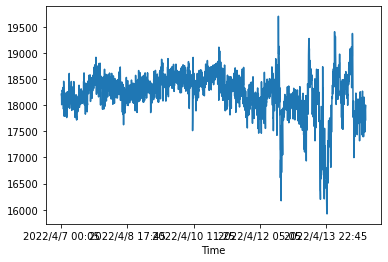

In [83]:
uni_data.plot(subplots=True)

**因為變化率有正有負，所以把資料都加1，轉成都是正的，然後再給後面做正規化，不然會出現分母很小整個出來的數字很大的可能性**

In [84]:
uni_data = uni_data.values

In [88]:
uni_data # 如果17XXX、18XXX，那就是實際流量

array([18211.16406, 18183.98047, 18182.50781, ..., 17957.92969,
       18002.9668 , 17719.14844])

In [72]:
uni_data = uni_data + 1

**正規化**

In [73]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [74]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [91]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

秀秀看`univariate_data`處裡完的資料如何

In [92]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[18211.16406]
 [18183.98047]
 [18182.50781]
 [18010.86328]
 [18056.63086]
 [18044.00781]
 [18034.33008]
 [18288.98438]
 [18265.02344]
 [18261.77148]
 [18105.41602]
 [18230.72656]
 [18338.37891]
 [18211.23242]
 [18135.65039]
 [18010.89844]
 [17928.22852]
 [17948.0918 ]
 [18458.875  ]
 [18355.82617]]

 Target temperature to predict
18119.92188


**資料做好了，試圖畫畫看長怎樣**

In [23]:
def create_time_steps(length):
    return list(range(-length, 0))

In [22]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

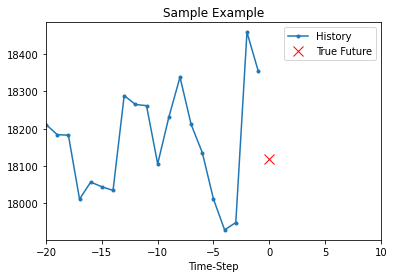

In [198]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [205]:
[x_train_uni[0], y_train_uni[0]]

[array([[18211.16406],
        [18183.98047],
        [18182.50781],
        [18010.86328],
        [18056.63086],
        [18044.00781],
        [18034.33008],
        [18288.98438],
        [18265.02344],
        [18261.77148],
        [18105.41602],
        [18230.72656],
        [18338.37891],
        [18211.23242],
        [18135.65039],
        [18010.89844],
        [17928.22852],
        [17948.0918 ],
        [18458.875  ],
        [18355.82617]]),
 18119.92188]

**做一個baseline來比較用，這個方法是用過去的平均直接當預測值**

In [46]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

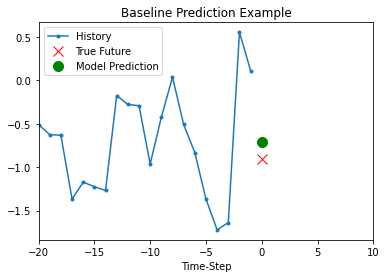

In [47]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

## 接下來使用RNN

Tensorflow Dataset 正式的名稱為 tf.data API，它是一個 Python Generator，可以視需要逐批讀取必要資料，不必一股腦將資料全部讀取放在記憶體，若資料量很大時，記憶體就爆了。另外，它還有快取(Cache)、預取(Prefetch)、篩選(Filter)、轉換(Map)...等功能，值得我們一探究竟。

In [86]:
## 1個batch共取256筆資料，其中一筆資料是前面設定每20筆資料當作一個窗格，然後每一個窗格的feature與label對上後打亂
## 其中每10000筆原始資料打亂一次，在這裡基本就是全部打亂一次
## 但因為一個窗格的feature與label還是在同一個train_univariate的tuple裡面，所以打亂比較沒關係
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
# train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_univariate = train_univariate.cache().batch(BATCH_SIZE).repeat() # 不打亂，因為每一窗格資料理論上前後要有關係

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [87]:
# iterator,查看一下tf.data出來是什麼東西
it = iter(train_univariate)
# 一次取一筆
print("next1 = ",next(it)[0],"\n", "next2 = ",next(it)[1].shape)

next1 =  tf.Tensor(
[[[-0.508015  ]
  [-0.62473214]
  [-0.63105524]
  ...
  [-1.63755827]
  [ 0.55557195]
  [ 0.11311515]]

 [[-0.62473214]
  [-0.63105524]
  [-1.36803877]
  ...
  [ 0.55557195]
  [ 0.11311515]
  [-0.89977805]]

 [[-0.63105524]
  [-1.36803877]
  [-1.17152827]
  ...
  [ 0.11311515]
  [-0.89977805]
  [-1.71402237]]

 ...

 [[ 1.90380686]
  [ 1.3778501 ]
  [ 1.63049684]
  ...
  [ 0.47000061]
  [-0.01073853]
  [ 1.29489519]]

 [[ 1.3778501 ]
  [ 1.63049684]
  [ 0.7669174 ]
  ...
  [-0.01073853]
  [ 1.29489519]
  [ 1.78203291]]

 [[ 1.63049684]
  [ 0.7669174 ]
  [ 0.24993371]
  ...
  [ 1.29489519]
  [ 1.78203291]
  [ 0.52635492]]], shape=(256, 20, 1), dtype=float64) 
 next2 =  (256,)


In [50]:
x_train_uni.shape # 共1480個窗格，1個窗格20筆資料，1個變數

(1480, 20, 1)

**開始用LSTM建模**

In [51]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [52]:
## 試丟一筆進去看預測出來的值，他的shape是不是對的(看來是對的，1個batch 256組資料，每一組有1個預測值)

for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

8/8 [==============================] - 1s 4ms/step
(256, 1)


In [53]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 4s 11ms/step - loss: 0.6929 - val_loss: 1.6370
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5607 - val_loss: 1.3882
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5478 - val_loss: 1.3242
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5420 - val_loss: 1.3042
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5370 - val_loss: 1.2981
Epoch 6/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5345 - val_loss: 1.3084
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5311 - val_loss: 1.3521
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5285 - val_loss: 1.3384
Epoch 9/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5266 - val_loss: 1.3585
Epoch 10/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5256 - val_loss: 1.368

8/8 [==============================] - 0s 2ms/step


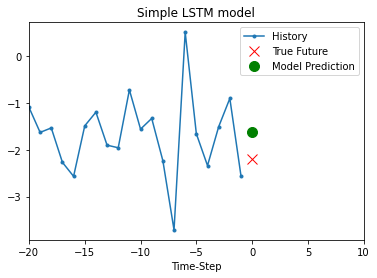

8/8 [==============================] - 0s 3ms/step


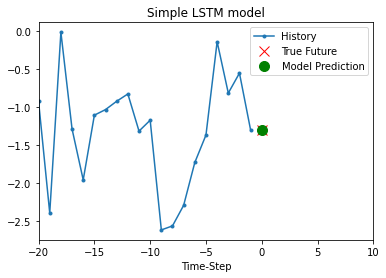

8/8 [==============================] - 0s 3ms/step


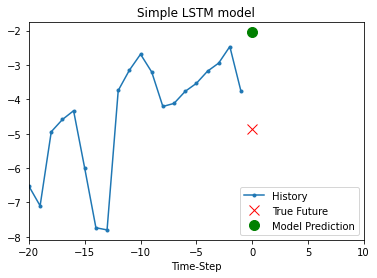

In [54]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

# 多變數的方式

### 前面資料已經整理完，再複製過來一次，方便閱讀

In [125]:
## 先將第一組資料分離出來訓練看看

part_1_df = pipe3.iloc[:,0:6]
part_1_df.index = part_1_df.iloc[:,0]
part_1_df.isnull().max() # 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面
part_1_df = part_1_df.drop(part_1_df.columns[0], axis='columns')
part_1_df

,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率
Time,,,,,
2022/4/7 00:05,-1.500216,18211.16406,17843.47336,0.002995,0.018048
2022/4/7 00:10,-1.796756,18183.98047,17764.79059,-0.001493,-0.004410
2022/4/7 00:15,-1.485461,18182.50781,17817.83091,-0.000081,0.002986
2022/4/7 00:20,-0.029753,18010.86328,17905.53583,-0.009440,0.004922
2022/4/7 00:25,0.226940,18056.63086,17997.47436,0.002541,0.005135
...,...,...,...,...,...
2022/4/14 23:35,0.415472,17945.28516,17919.73659,0.009418,-0.001940
2022/4/14 23:40,-1.595123,17919.31445,17539.53723,-0.001447,-0.021217
2022/4/14 23:45,-1.075228,17957.92969,17667.95885,0.002155,0.007322


In [126]:
## 這邊是測試用，把變化率全部+3，強迫他全部變成正的，然後再訓練看看結果如何
part_1_df.iloc[:,-1] = part_1_df.iloc[:,-1] + 1
part_1_df.iloc[:,-2] = part_1_df.iloc[:,-2] + 1
part_1_df.describe(include='all')

,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,0.388515,18218.901941,18198.842367,1.000074,1.000151
std,2.369656,408.398825,567.370506,0.013047,0.016687
min,-14.237984,15919.327150,15988.052020,0.935901,0.923319
25%,-1.137796,18051.263670,17853.681035,0.992414,0.989380
50%,0.357233,18281.957030,18165.078060,0.999936,1.000396
75%,1.974995,18470.547850,18556.502155,1.007105,1.010877
max,8.213395,19703.919920,19885.668610,1.089227,1.092215


array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current

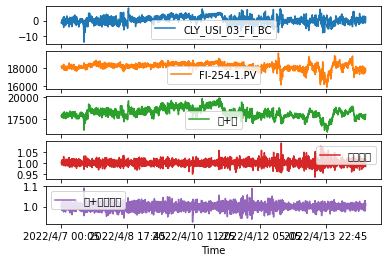

In [127]:
## 畫畫看，會出現警告應該是中文字無法顯示

part_1_df.plot(subplots=True)

### 做正規化

In [128]:
dataset = part_1_df.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [129]:
print(data_mean)
print(data_std)

[7.54185226e-01 1.83294815e+04 1.83788294e+04 1.00006024e+00
 1.00017890e+00]
[2.33670045e+00 2.32901446e+02 5.17291015e+02 1.10126432e-02
 1.81609309e-02]


In [122]:
dataset = (dataset-data_mean)/data_std

### 試試看改用MinMaxScaler

In [151]:
## 正規化 normalize MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
dataset = part_1_df.values
dataset = min_max_scaler.fit_transform(dataset)
# dataset = pd.DataFrame(dataset)
dataset

array([[0.53106983, 0.60278803, 0.57116359, 0.34152128, 0.14114004],
       [0.51998042, 0.62430425, 0.58328498, 0.51556858, 0.15263564],
       [0.42040471, 0.67738718, 0.57344584, 0.57139894, 0.13896234],
       ...,
       [0.39737874, 0.46447158, 0.38475697, 0.53723703, 0.14755611],
       [0.48249754, 0.42190373, 0.39253627, 0.3979717 , 0.15025012],
       [0.46488899, 0.43693228, 0.39612296, 0.50542204, 0.1474543 ]])

In [152]:
pd.DataFrame(dataset).describe(include='all')
# dataset.shape

,0,1,2,3,4
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,0.488527,0.538335,0.494244,0.477736,0.145506
std,0.125092,0.180679,0.148832,0.099652,0.029969
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.415831,0.386578,0.362863,0.422808,0.131379
50%,0.488869,0.592356,0.545603,0.477567,0.145127
75%,0.560969,0.675942,0.610443,0.533435,0.159323
max,1.000000,1.000000,1.000000,1.000000,1.000000


array([<AxesSubplot:>], dtype=object)

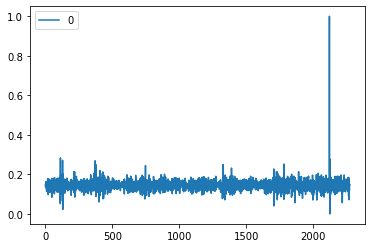

In [153]:
# 把上述第3欄畫出來看看
pd.DataFrame(dataset[:,-1]).plot(subplots=True)

### 多變量的參數設置，寫成函數等等使用

In [7]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

### 設置參數，並將窗格大小、預測未來多久的值、取資料一次取幾筆(減少資料量，這裡不用，資料不大)定義出來

In [154]:
past_history = 20
future_target = 1
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [155]:
## 看一個窗格長怎樣，目前一個窗格共8筆資料(看past_history設定)，每筆資料有2個feature(台聚流量變化率與中油+亞聚流量變化率)

print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (20, 2)


In [156]:
## tf.data，弄成generator，忘記翻前面單變量的地方看

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat() # 不要打亂試試看

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

### LSTM建模

In [141]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(16,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [142]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

8/8 [==============================] - 0s 2ms/step
(256, 1)


In [157]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0223 - val_loss: 0.0247
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0195 - val_loss: 0.0219
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0185 - val_loss: 0.0207
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0180 - val_loss: 0.0209
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0176 - val_loss: 0.0203
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0174 - val_loss: 0.0201
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0173 - val_loss: 0.0203
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0172 - val_loss: 0.0213
Epoch 9/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0172 - val_loss: 0.0201
Epoch 10/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0171 - val_loss: 0.0201

In [16]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

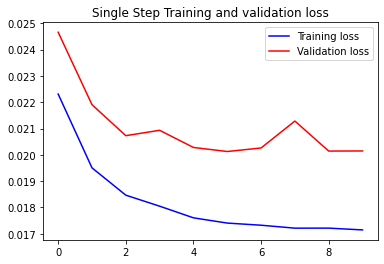

In [158]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [265]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [216]:
x[0].numpy().shape

(50, 1)

### 換下一組資料訓練看看

In [150]:
## 換第二組資料分離出來訓練看看

part_1_df = pipe3.iloc[:,9:15].copy()
part_1_df.index = part_1_df.iloc[:,0]

# 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面
part_1_df.isnull().max() 
part_1_df = part_1_df.drop(part_1_df.columns[0], axis='columns')

# 直接去除missing data
part_1_df = part_1_df.dropna()

## 把偏差值大於10或小於-10的拿掉，當作離群值
keep_indexs = (part_1_df.iloc[:,0]> -10) & (part_1_df.iloc[:,0]< 10)
part_1_df = part_1_df[keep_indexs]

part_1_df

,CLY_USI_03_FI_BC.1,FI-254-1.PV.1,中+亞.1,台變化率.1,中+亞變化率.1
Time.1,,,,,
2022/4/21 00:05,0.456938,18027.29883,18009.59157,-0.021432,-0.002111
2022/4/21 00:10,0.253395,18136.83984,18082.66035,0.006076,0.004057
2022/4/21 00:15,-1.574295,18407.08984,18023.34915,0.014901,-0.003280
2022/4/21 00:20,-2.608507,18462.17578,17895.37368,0.002993,-0.007101
2022/4/21 00:25,-3.278737,18651.43555,17962.49268,0.010251,0.003751
...,...,...,...,...,...
2022/4/28 21:35,1.111757,17044.02930,17134.52355,0.009824,0.012910
2022/4/28 21:40,-1.165910,17160.07617,16863.46339,0.006809,-0.015820
2022/4/28 21:45,-1.996932,17323.11719,16885.91698,0.009501,0.001331


### 換做multi-step看看

In [160]:
## 往後預測3筆資料(future_target設定)
future_target = 5
x_train_multi, y_train_multi = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [161]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (20, 2)

 Target to predict : (5,)


In [162]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat() # 這邊是沒有打亂的

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [163]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
                 label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
               label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

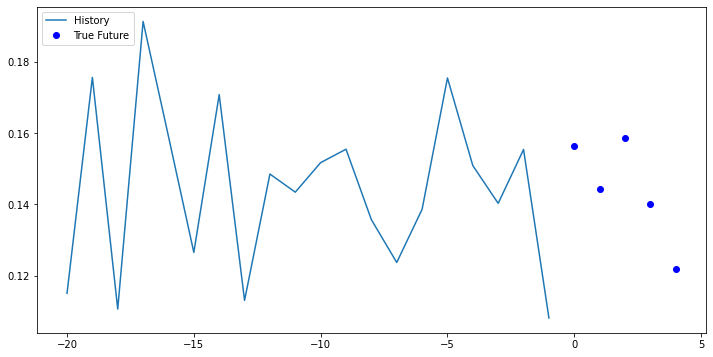

In [164]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [165]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(5)) # 要隨著你要預測幾筆資料做修改

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [166]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

8/8 [==============================] - 0s 3ms/step
(256, 5)


In [167]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 6s 19ms/step - loss: 0.0244 - val_loss: 0.0215
Epoch 2/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0180 - val_loss: 0.0214
Epoch 3/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0177 - val_loss: 0.0207
Epoch 4/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0175 - val_loss: 0.0205
Epoch 5/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0175 - val_loss: 0.0207
Epoch 6/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0174 - val_loss: 0.0205
Epoch 7/10
200/200 [==============================] - 5s 25ms/step - loss: 0.0173 - val_loss: 0.0207
Epoch 8/10
200/200 [==============================] - 4s 21ms/step - loss: 0.0172 - val_loss: 0.0205
Epoch 9/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0171 - val_loss: 0.0206
Epoch 10/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0170 - val_lo

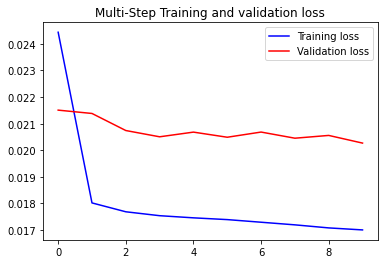

In [168]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

8/8 [==============================] - 0s 3ms/step


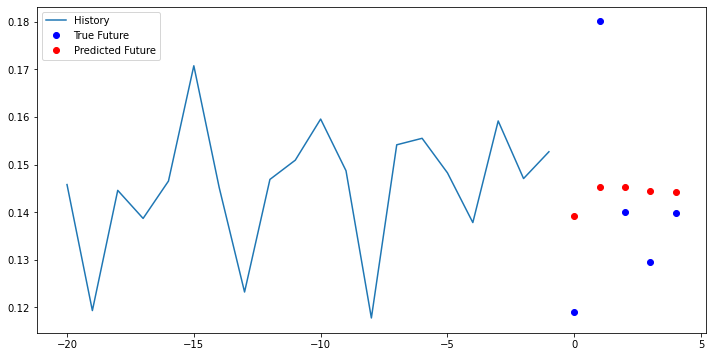

8/8 [==============================] - 0s 3ms/step


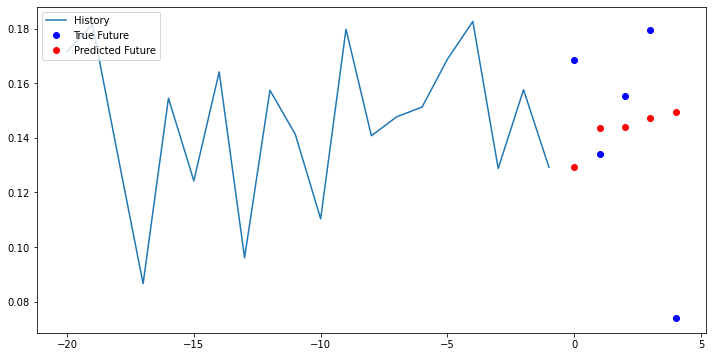

8/8 [==============================] - 0s 3ms/step


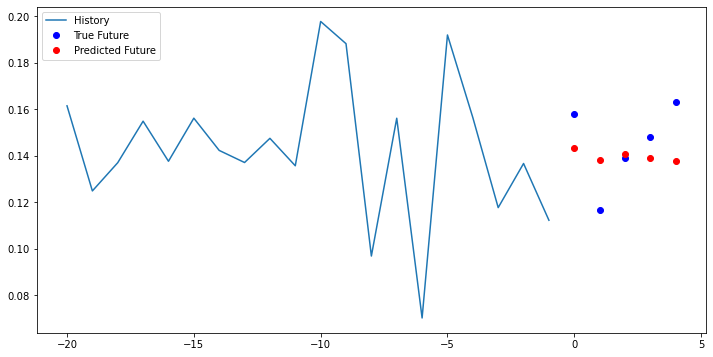

In [169]:
## 拿三筆資料出來畫畫看
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

## 試圖把每一組資料取出來，並把離群值拿掉，放到list中，然後丟進去訓練看結果

In [3]:
#先把全部資料一組一組放進list中
all_df = [pipe3.iloc[:,0:6].copy(), pipe3.iloc[:,9:15].copy(), pipe3.iloc[:,16:22].copy(), pipe3.iloc[:,23:29].copy(), pipe3.iloc[:,30:36].copy(), ]
all_df[2]

,Time.2,CLY_USI_03_FI_BC.2,FI-254-1.PV.2,中+亞.2,台變化率.2,中+亞變化率.2
1,2022/5/19 00:05,1.644252,14113.86621,14248.14154,-0.000955,-0.003986
2,2022/5/19 00:10,1.588008,14134.21777,14260.67843,0.001442,0.000880
3,2022/5/19 00:15,2.781575,13875.63770,14169.78080,-0.018295,-0.006374
4,2022/5/19 00:20,4.212529,13683.78320,14181.16902,-0.013827,0.000804
5,2022/5/19 00:25,4.129728,13641.11816,14124.41819,-0.003118,-0.004002
...,...,...,...,...,...,...
2299,NaN,NaN,NaN,NaN,NaN,NaN
2300,NaN,NaN,NaN,NaN,NaN,NaN
2301,NaN,NaN,NaN,NaN,NaN,NaN
2302,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for part_index, part_df in enumerate(all_df):
    ##把時間軸當成index，並把原本的時間軸那欄拿掉，不然會變成index是時間軸，第0欄也是時間軸
    part_df.index = part_df.iloc[:,0]
    part_df = part_df.drop(part_df.columns[0], axis='columns')
    
    ## 直接去除missing data
    part_df = part_df.dropna()
    
#     ## 把偏差值大於10或小於-10的拿掉，當作離群值，也把剛好=0的拿掉，但是否會影響訓練結果要再做實驗看看，以及倒數第二組資料有個變化率32的值，把這個值拿掉
#     keep_indexs = (part_df.iloc[:,0] > -20) & (part_df.iloc[:,0] < 20) & (part_df.iloc[:,0] != 0) & (part_df.iloc[:,0] != 0)
#     part_df = part_df[keep_indexs]
    
     ## 直接計算離群值，只保留於 Q3 + 1.5*(Q3-Q1)，與於Q1 - 1.5*(Q3-Q1)之間的值
    usi_var = part_df.iloc[:,-2].copy()    
    total_var = part_df.iloc[:,-1].copy()
    usi_var_Q1 = np.quantile(usi_var, 0.25)
    usi_var_Q3 = np.quantile(usi_var, 0.75)
    total_var_Q1 = np.quantile(total_var, 0.25)
    total_var_Q3 = np.quantile(total_var, 0.75)
    keep_indexs = (usi_var > usi_var_Q1 - 1.5*(usi_var_Q3-usi_var_Q1)) & (usi_var < usi_var_Q3 + 1.5*(usi_var_Q3-usi_var_Q1)) & (total_var > total_var_Q1 - 1.5*(total_var_Q3-total_var_Q1)) & (total_var < total_var_Q3 + 1.5*(total_var_Q3-total_var_Q1))
    part_df = part_df[keep_indexs]
    
    ## 把原本list中的元素替換掉
    all_df[part_index] = part_df
    
    ##印出來看看是否每一組都有成功處理
    print (part_df.shape)
    print (part_df.describe())

(2209, 5)
       CLY_USI_03_FI_BC   FI-254-1.PV           中+亞         台變化率       中+亞變化率
count       2209.000000   2209.000000   2209.000000  2209.000000  2209.000000
mean           0.402803  18230.822311  18213.040316    -0.000073     0.000214
std            2.282325    392.364921    555.278053     0.010807     0.015472
min           -8.491730  15919.327150  15988.052020    -0.028775    -0.042052
25%           -1.114094  18061.060550  17863.798540    -0.007254    -0.010304
50%            0.347682  18287.791020  18173.913530    -0.000070     0.000392
75%            1.968546  18471.980470  18566.530010     0.006694     0.010694
max            8.213395  19374.148440  19859.436420     0.028735     0.042547
(2145, 5)
       CLY_USI_03_FI_BC.1  FI-254-1.PV.1         中+亞.1       台變化率.1  \
count         2145.000000    2145.000000   2145.000000  2145.000000   
mean            -0.333143   17723.541396  17568.520984     0.000254   
std              2.171533     907.202874    891.510230     0.0126

In [ ]:
# 不做任何正規畫處理
dataset = all_df[0].values

In [5]:
## 每一串資料做正規化 normalize MinMaxScaler，然後看看第1四分位數跟第3四分位數中間差多遠
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
for part_df in all_df:
    dataset = part_df.values
    dataset = min_max_scaler.fit_transform(dataset)
    # dataset = pd.DataFrame(dataset)
    print (pd.DataFrame(dataset).describe())

                 0            1            2            3            4
count  2209.000000  2209.000000  2209.000000  2209.000000  2209.000000
mean      0.532443     0.669064     0.574727     0.499075     0.499608
std       0.136624     0.113570     0.143431     0.187910     0.182882
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.441639     0.619926     0.484516     0.374213     0.375276
50%       0.529144     0.685553     0.564620     0.499131     0.501708
75%       0.626172     0.738867     0.666035     0.616745     0.623483
max       1.000000     1.000000     1.000000     1.000000     1.000000
                 0            1            2            3            4
count  2145.000000  2145.000000  2145.000000  2145.000000  2145.000000
mean      0.435690     0.608548     0.624945     0.500159     0.491024
std       0.111202     0.199659     0.185594     0.182154     0.187445
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%   

In [34]:
## 這邊都是上面設定過的參數只是複製過來比較好看好使用，下面跑迴圈時的參數要記得改得跟這裡一樣
TRAIN_SPLIT= 1500
tf.random.set_seed(13)
EVALUATION_INTERVAL = 200
EPOCHS = 20

#設置參數
past_history = 30
future_target = 1
STEP = 1 # 因為資料中間沒有省略，所以這份資料中每5分鐘就是一個step，我也是每5分鐘就直接取一筆，若10分鐘取一筆，才設定2，意思是一次step是兩步

x_train_single, y_train_single = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                       TRAIN_SPLIT, past_history,
                                                       future_target, STEP,
                                                       single_step=True)
x_val_single, y_val_single = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                                   TRAIN_SPLIT, None, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

### 先建模LSTM

In [33]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           return_sequences=True,
                                           dropout=0.1,
                                           recurrent_dropout=0.5,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.LSTM(64,
                                            dropout=0.1,
                                            recurrent_dropout=0.5,
                                            activation='relu'))


## 多加Dense layer試試看，看能不能提升準確度
# single_step_model.add(tf.keras.layers.Dense(64, activation='relu'))
# single_step_model.add(tf.keras.layers.BatchNormalization())     # Batch Norm
# single_step_model.add(tf.keras.layers.Dropout(0.2))  # 解決overfitting

single_step_model.add(tf.keras.layers.Dense(1))

# single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
single_step_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae') # 改用Adam當優化器試試看
single_step_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30, 32)            4480      
                                                                 
 lstm_11 (LSTM)              (None, 64)                24832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,377
Trainable params: 29,377
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_train_single.shape

(1470, 30, 2)

In [11]:
x_val_single.shape

(632, 30, 2)

In [12]:
y_val_single.shape

(632,)

In [21]:
## 若要改成單純用dense layer，不用LSTM做訓練，需要看一下資料預測出來有什麼區別
for x, y in val_data_single.take(1):
#     print(y)
    print(single_step_model.predict(x).shape)

8/8 [==============================] - 0s 5ms/step
(256, 1)


### 直接用多變數single-step的模型做

Epoch 1/20
200/200 [==============================] - 24s 100ms/step - loss: 0.1736 - val_loss: 0.1191
Epoch 2/20
200/200 [==============================] - 22s 111ms/step - loss: 0.1613 - val_loss: 0.1191
Epoch 3/20
200/200 [==============================] - 21s 103ms/step - loss: 0.1608 - val_loss: 0.1189
Epoch 4/20
200/200 [==============================] - 23s 117ms/step - loss: 0.1604 - val_loss: 0.1184
Epoch 5/20
200/200 [==============================] - 19s 96ms/step - loss: 0.1597 - val_loss: 0.1204
Epoch 6/20
200/200 [==============================] - 19s 96ms/step - loss: 0.1586 - val_loss: 0.1180
Epoch 7/20
200/200 [==============================] - 20s 99ms/step - loss: 0.1571 - val_loss: 0.1172
Epoch 8/20
200/200 [==============================] - 20s 101ms/step - loss: 0.1555 - val_loss: 0.1173
Epoch 9/20
200/200 [==============================] - 20s 102ms/step - loss: 0.1544 - val_loss: 0.1185
Epoch 10/20
200/200 [==============================] - 21s 104ms/step - loss

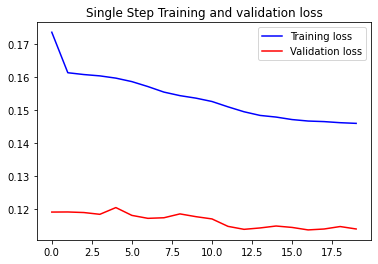

8/8 [==============================] - 0s 5ms/step


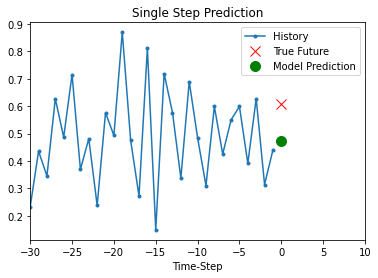

8/8 [==============================] - 0s 6ms/step


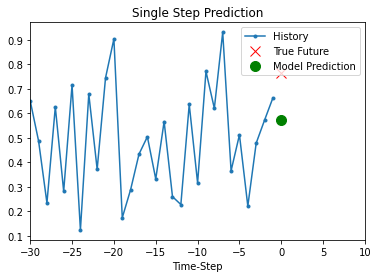

6/6 [==============================] - 0s 5ms/step


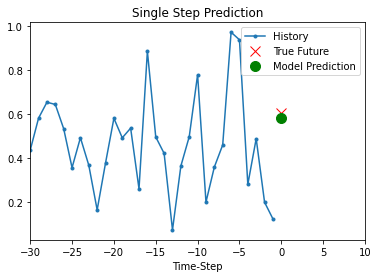

Epoch 1/20
200/200 [==============================] - 20s 102ms/step - loss: 0.1455 - val_loss: 0.1602
Epoch 2/20
200/200 [==============================] - 20s 98ms/step - loss: 0.1444 - val_loss: 0.1609
Epoch 3/20
200/200 [==============================] - 19s 97ms/step - loss: 0.1443 - val_loss: 0.1600
Epoch 4/20
200/200 [==============================] - 19s 97ms/step - loss: 0.1442 - val_loss: 0.1602
Epoch 5/20
200/200 [==============================] - 20s 101ms/step - loss: 0.1440 - val_loss: 0.1604
Epoch 6/20
200/200 [==============================] - 21s 103ms/step - loss: 0.1441 - val_loss: 0.1601
Epoch 7/20
200/200 [==============================] - 21s 103ms/step - loss: 0.1441 - val_loss: 0.1602
Epoch 8/20
200/200 [==============================] - 20s 102ms/step - loss: 0.1437 - val_loss: 0.1602
Epoch 9/20
200/200 [==============================] - 20s 99ms/step - loss: 0.1440 - val_loss: 0.1602
Epoch 10/20
200/200 [==============================] - 20s 98ms/step - loss: 

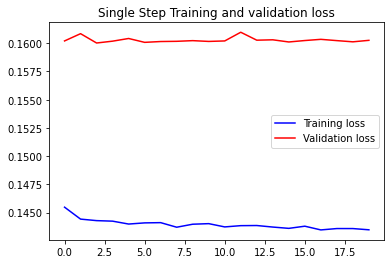

8/8 [==============================] - 0s 6ms/step


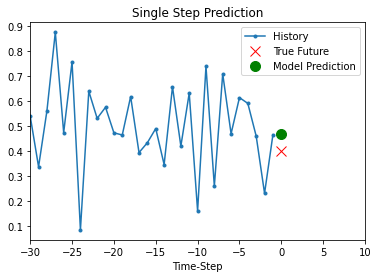

8/8 [==============================] - 0s 5ms/step


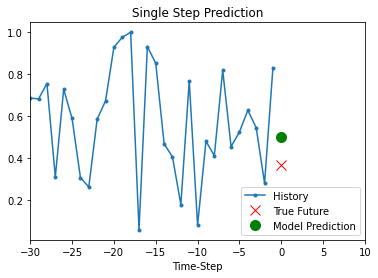

4/4 [==============================] - 0s 5ms/step


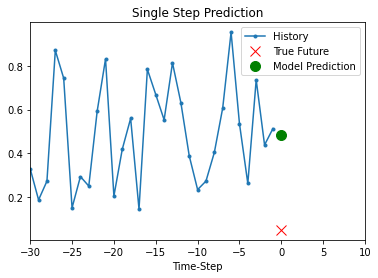

Epoch 1/20
200/200 [==============================] - 20s 98ms/step - loss: 0.1519 - val_loss: 0.1225
Epoch 2/20
200/200 [==============================] - 20s 100ms/step - loss: 0.1511 - val_loss: 0.1238
Epoch 3/20
200/200 [==============================] - 21s 103ms/step - loss: 0.1507 - val_loss: 0.1239
Epoch 4/20
200/200 [==============================] - 21s 105ms/step - loss: 0.1507 - val_loss: 0.1242
Epoch 5/20
200/200 [==============================] - 21s 105ms/step - loss: 0.1505 - val_loss: 0.1247
Epoch 6/20
200/200 [==============================] - 20s 100ms/step - loss: 0.1503 - val_loss: 0.1246
Epoch 7/20
200/200 [==============================] - 20s 99ms/step - loss: 0.1503 - val_loss: 0.1253
Epoch 8/20
200/200 [==============================] - 20s 99ms/step - loss: 0.1498 - val_loss: 0.1255
Epoch 9/20
200/200 [==============================] - 20s 102ms/step - loss: 0.1500 - val_loss: 0.1235
Epoch 10/20
200/200 [==============================] - 21s 103ms/step - loss

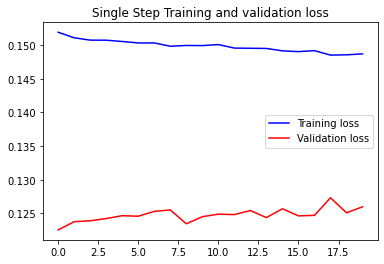

8/8 [==============================] - 0s 7ms/step


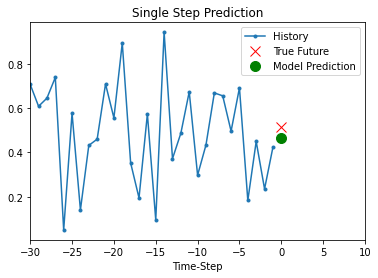

8/8 [==============================] - 0s 7ms/step


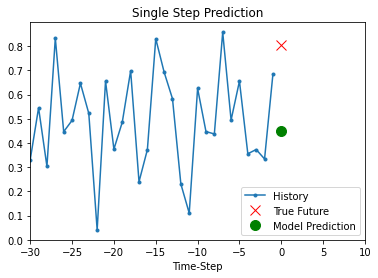

3/3 [==============================] - 0s 6ms/step


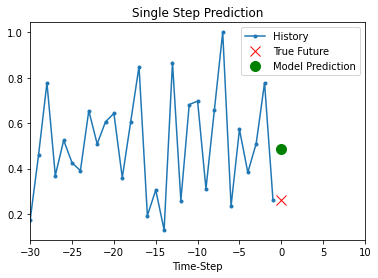

Epoch 1/20
200/200 [==============================] - 20s 99ms/step - loss: 0.1424 - val_loss: 0.1776
Epoch 2/20
200/200 [==============================] - 19s 97ms/step - loss: 0.1413 - val_loss: 0.1777
Epoch 3/20
200/200 [==============================] - 20s 98ms/step - loss: 0.1411 - val_loss: 0.1777
Epoch 4/20
200/200 [==============================] - 20s 102ms/step - loss: 0.1405 - val_loss: 0.1785
Epoch 5/20
182/200 [==========================>...] - ETA: 1s - loss: 0.1402

KeyboardInterrupt: 

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

## 1個batch共取256筆資料，其中一筆資料是前面設定每20筆資料當作一個窗格，然後每一個窗格的feature與label對上後打亂
## 其中每10000筆原始資料打亂一次，在這裡基本就是全部打亂一次
## 但因為一個窗格的feature與label還是在同一個train_univariate的tuple裡面，所以打亂比較沒關係
BATCH_SIZE = 256
BUFFER_SIZE = 10000

for part_df in all_df:
    #正規化(在這裡要用MinMaxScaler正規化效果比較好)
    dataset = part_df.values
    dataset = min_max_scaler.fit_transform(dataset)
#     data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
    data_std = dataset[:TRAIN_SPLIT].std(axis=0)
#     dataset = (dataset-data_mean)/data_std

    #設置參數，這裡記得跟上上格程式的第一次預設定時要一模一樣
    past_history = 30
    future_target = 1
    STEP = 1

    x_train_single, y_train_single = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                       TRAIN_SPLIT, past_history,
                                                       future_target, STEP,
                                                       single_step=True)
    x_val_single, y_val_single = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                                   TRAIN_SPLIT, None, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

    ## tf.data，弄成generator
    train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
    train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#     train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat() # 不要打亂試試看

    val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
    val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

    ## training
    single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                                steps_per_epoch=EVALUATION_INTERVAL,
                                                validation_data=val_data_single,
                                                validation_steps=50)

    ## 每一次都把訓練過程跟結果畫出來看看(single-step)
    plot_train_history(single_step_history,
                       'Single Step Training and validation loss')
    for x, y in val_data_single.take(3):
        plot = show_plot([x[0][:, 0].numpy(), y[0].numpy(),
                        single_step_model.predict(x)[0]], 0,
                       'Single Step Prediction')
        plot.show()
        
    ## 拿三筆資料出來畫畫看(multi-step)
#     plot_train_history(single_step_history, 'Multi-Step Training and validation loss')
#     for x, y in val_data_single.take(3):
#         multi_step_plot(x[0], y[0], single_step_model.predict(x)[0])